In [1]:
import json
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list

result_list = load_json('LS_L')

df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
show_grouped_result

,task_num,random_u,random_c,random_t,LS_CF_u,LS_CF_c,LS_CF_t,LS_CF_iter,GA_u,GA_c,GA_t,GA_iter,int_GA_u,int_GA_iter
0,100,1683.42,492.93,0.003472,3177.63,500,0.369911,47.67,3631.36,500,24.302010,460.59,2443.16,6.48
1,200,3520.72,993.77,0.010344,6464.89,1000,2.068100,80.81,7294.24,1000,68.768955,757.79,5326.35,22.31
2,300,5516.85,1493.73,0.021127,10133.91,1500,6.380166,123.20,11003.20,1500,136.439851,1057.35,8405.59,48.94
3,400,7462.39,1992.51,0.036132,13794.44,2000,14.334870,160.53,14615.09,2000,226.157277,1294.94,11521.05,81.66
4,500,9301.63,2492.56,0.054195,17342.01,2500,27.485950,204.35,18237.80,2500,351.120055,1648.51,14877.25,128.71
5,600,11173.87,2992.85,0.076422,21056.93,3000,47.169152,251.65,21760.33,3000,461.047232,1830.27,18346.87,186.90
6,700,13223.10,3493.42,0.105279,23907.91,3500,71.912777,272.24,25496.13,3500,599.513804,2052.60,21859.83,245.55
7,800,15017.24,3992.87,0.133807,28085.51,4000,109.700627,334.73,28935.53,4000,790.335820,2297.91,25277.36,318.88
8,900,16976.03,4493.56,0.172652,30797.13,4500,151.112259,354.16,32662.04,4500,929.720296,2407.99,28836.54,390.86
9,1000,18754.09,4992.41,0.208334,34997.39,5000,210.242096,408.90,35927.86,5000,1005.127763,2361.84,32445.75,493.12


In [3]:
############### Compare GA and CF #######################
exp_times = len(result_list)/len(result_agg)
exp_ind = list(range(0, int(exp_times)))

tasks = [result_list[i]['task_num'] for i in range(0, len(result_agg))]
CF_u = [[] for i in range(0, len(tasks))]
GA_u = [[] for i in range(0, len(tasks))]
extra_ind = [[] for i in range(0, len(tasks))]
for t in tasks:
    t_ind = tasks.index(t)
    for i in range(0, len(result_list)):
        if result_list[i]['task_num'] == t:
            CF_u[t_ind].append(result_list[i]['LS_CF_u'])
            GA_u[t_ind].append(result_list[i]['GA_u'])
        extra_ind[t_ind].append(result_list[i]['ex_identifier'])

GA_better_CF = [0 for i in list(range(0, len(tasks)))] 
CF_better_GA = [0 for i in list(range(0, len(tasks)))] 
equal = [0 for i in list(range(0, len(tasks)))] 
for k in exp_ind:
    for i in range(0, len(tasks)): 
        if GA_u[i][k] > CF_u[i][k]:
            GA_better_CF[i] += 1   
        if GA_u[i][k] < CF_u[i][k]:
            CF_better_GA[i] += 1
        if GA_u[i][k] == CF_u[i][k]:
            equal[i] += 1

print(GA_better_CF[1:10:2])  
print(CF_better_GA[1:10:2]) 
print(equal[1:10:2])



[81, 62, 59, 45, 34]
[19, 38, 41, 55, 66]
[0, 0, 0, 0, 0]


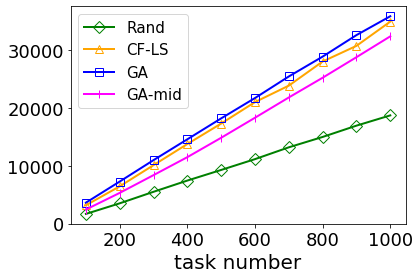

In [3]:
# utility
plt.figure()
x = result_agg['task_num']
y1 = result_agg['random_u']
plt.plot(x, y1, 'b-', linewidth=2, color='green', marker='D', fillstyle='none', markersize=8)

y2 = result_agg['LS_CF_u']
plt.plot(x, y2, 'b-', linewidth=2, color='orange', marker='^', fillstyle='none', markersize=8)

y5 = result_agg['GA_u']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

y7 = result_agg['int_GA_u']
plt.plot(x, y7, 'b-', linewidth=2, color='magenta', marker='|', fillstyle='none', markersize=8)

plt.legend(['Rand', 'CF-LS', 'GA', 'GA-mid'], fontsize=15)
# plt.ylabel('utility', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('LS_u.pdf',bbox_inches='tight')